In [2]:
import numpy as np  
import pandas as pd 

# load_dataset

In [3]:
imbd_df = pd.read_csv("IMDB Dataset.csv")
imbd_df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


# EDA

In [4]:
imbd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [5]:
imbd_df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [6]:
imbd_df.duplicated().sum()

418

In [7]:
imbd_df.drop_duplicates(inplace=True)

In [8]:
imbd_df.duplicated().sum()

0

In [9]:
imbd_df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [10]:
imbd_df['review'][0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

In [11]:
imbd_df.dtypes

review       object
sentiment    object
dtype: object

Data_Preprocessing

In [12]:
#remove html tags 
import re 
def rmv_tags(raw_text):
    clean_text = re.sub(re.compile('<.*?>'),' ',raw_text)
    return clean_text

In [13]:
imbd_df['review'] = imbd_df['review'].apply(rmv_tags)

In [14]:
imbd_df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. The filming t...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [15]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\Akash Yadav\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [16]:
from nltk.corpus import stopwords

In [17]:
import nltk

In [18]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Akash
[nltk_data]     Yadav\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [19]:
stp_words = stopwords.words('english')

In [20]:
imbd_df['review'] = imbd_df['review'].apply(lambda x:[item for item in x.split() if item not in stp_words]).apply(lambda x:' '.join(x))

In [21]:
imbd_df['review']

0        One reviewers mentioned watching 1 Oz episode ...
1        A wonderful little production. The filming tec...
2        I thought wonderful way spend time hot summer ...
3        Basically there's family little boy (Jake) thi...
4        Petter Mattei's "Love Time Money" visually stu...
                               ...                        
49995    I thought movie right good job. It creative or...
49996    Bad plot, bad dialogue, bad acting, idiotic di...
49997    I Catholic taught parochial elementary schools...
49998    I'm going disagree previous comment side Malti...
49999    No one expects Star Trek movies high art, fans...
Name: review, Length: 49582, dtype: object

In [22]:
imbd_df['sentiment']

0        positive
1        positive
2        positive
3        negative
4        positive
           ...   
49995    positive
49996    negative
49997    negative
49998    negative
49999    negative
Name: sentiment, Length: 49582, dtype: object

In [23]:
import matplotlib.pyplot as plt 

In [24]:
imbd_df['review_len'] = imbd_df['review'].apply(len)

[]

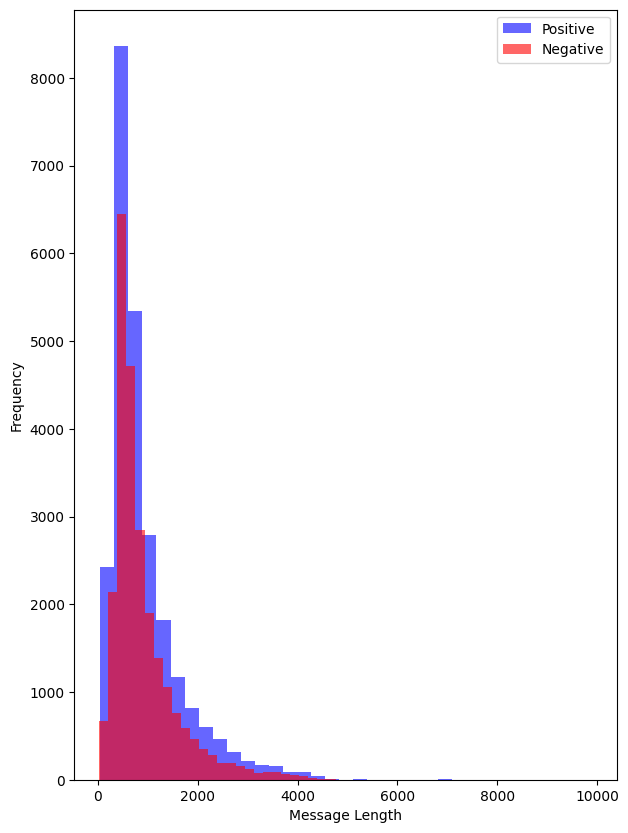

In [25]:
plt.figure(figsize=(7,10))
imbd_df[imbd_df['sentiment']=='positive'].review_len.plot(bins=35, kind='hist', color='blue',
                                       label='Positive', alpha=0.6)
imbd_df[imbd_df['sentiment']=='negative'].review_len.plot(bins=35, kind='hist', color='red',
                                       label='Negative', alpha=0.6)
plt.legend()
plt.xlabel("Message Length")
plt.plot()

In [26]:
# labelEncoding for sentiment data 
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()

In [27]:
imbd_df['sentiment'] = le.fit_transform(imbd_df['sentiment'])

In [28]:
imbd_df['sentiment'].value_counts()

sentiment
1    24884
0    24698
Name: count, dtype: int64

In [29]:
X = imbd_df['review']
Y = imbd_df['sentiment']

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=.25, random_state=1)

In [31]:
print(X_train.shape)
print(X_test.shape)
print()
print(Y_train.shape)
print(Y_test.shape)

(37186,)
(12396,)

(37186,)
(12396,)


Applying BOW

In [32]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000)

In [33]:
X_train_bow = cv.fit_transform(X_train).toarray()

In [34]:
X_test_bow = cv.fit_transform(X_test).toarray()

In [35]:
X_train_bow

array([[0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]], dtype=int64)

In [36]:
X_test_bow.shape

(12396, 5000)

In [37]:
X_train_bow.shape

(37186, 5000)

In [38]:
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB()

In [39]:
gnb.fit(X_train_bow,Y_train)

GaussianNB()

In [40]:
y_pred = gnb.predict(X_test_bow)

In [41]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [42]:
accuracy_score(y_pred,Y_test)

0.5165375927718618

In [43]:
accuracy_score(Y_test,y_pred)

0.5165375927718618

In [44]:
confusion_matrix(y_pred,Y_test)

array([[1575, 1329],
       [4664, 4828]], dtype=int64)

In [51]:
cv = CountVectorizer(max_features=3000)
X_train_bow = cv.fit_transform(X_train).toarray()
X_test_bow = cv.fit_transform(X_test).toarray()

In [52]:
from sklearn.ensemble import RandomForestClassifier 
rf = RandomForestClassifier()

In [53]:
rf.fit(X_train_bow,Y_train)

RandomForestClassifier()

In [54]:
y2_pred = rf.predict(X_test_bow)

In [55]:
accuracy_score(Y_test,y2_pred)

0.5333978702807357

In [56]:
confusion_matrix(y2_pred,Y_test)

array([[5032, 4577],
       [1207, 1580]], dtype=int64)

## Using TfIdf

In [60]:
from sklearn.feature_extraction.text import TfidfVectorizer 
tfidf = TfidfVectorizer(max_features=5500)

In [61]:
X_train_tfidf = tfidf.fit_transform(X_train).toarray()
X_test_tfidf = tfidf.fit_transform(X_test).toarray()

In [62]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier() 

In [63]:
rfc.fit(X_train_tfidf,Y_train)

RandomForestClassifier()

In [66]:
y3_pred = rfc.predict(X_test_tfidf)

In [68]:
accuracy_score(y3_pred,Y_test)

0.5909164246531139

In [69]:
confusion_matrix(y3_pred,Y_test) 

array([[3647, 2479],
       [2592, 3678]], dtype=int64)